# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# os.getcwd()

In [2]:
os.getcwd()

'/Users/summer/Library/CloudStorage/GoogleDrive-summeryang720@gmail.com/My Drive/Obsidian/5B/STAD95/STAD95/Report'

In [3]:
file_dir=os.getcwd()[:-6]+ 'Data/'

In [4]:
price_2022 = pd.read_csv(file_dir+'raw/hourly/hourly_data_2022.csv')
price_2023 = pd.read_csv(file_dir+'raw/hourly/hourly_data_2023.csv')
demand_2022 = pd.read_csv(file_dir+'raw/hourly/PUB_Demand_2022.csv')
demand_2023 = pd.read_csv(file_dir+'raw/hourly/PUB_Demand_2023.csv')

In [5]:
price = pd.concat([price_2022,price_2023]).reset_index().drop(columns={'index'})

In [6]:
price.head()

,Date,Hour,HOEP,Hour 1 Predispatch,Hour 2 Predispatch,Hour 3 Predispatch,OR 10 Min Sync,OR 10 Min non-sync,OR 30 Min
0,2022-01-01,1,32.18,27.75,27.73,32.41,1.19,0.2,0.2
1,2022-01-01,2,59.04,23.23,28.62,32.41,1.30,0.2,0.2
2,2022-01-01,3,18.79,17.00,14.36,29.13,1.21,0.2,0.2
3,2022-01-01,4,15.78,18.00,17.20,14.39,1.22,0.2,0.2
4,2022-01-01,5,0.41,12.99,12.99,29.51,1.23,0.2,0.2


In [7]:
demand = pd.concat([demand_2022,demand_2023]).reset_index().drop(columns={'index'}) 

In [8]:
demand.head()

,Date,Hour,Market Demand,Ontario Demand
0,2022-01-01,1,15150,13543
1,2022-01-01,2,15344,13254
2,2022-01-01,3,14686,12683
3,2022-01-01,4,14400,12491
4,2022-01-01,5,14043,12493


In [9]:
df = pd.merge(price,demand,on=['Date','Hour'],how = 'left')

In [10]:
df = df[['Date','Hour','HOEP','Hour 1 Predispatch','Hour 2 Predispatch','Hour 3 Predispatch','Market Demand','Ontario Demand']]

In [11]:
date=pd.to_datetime(df['Date'])
hour=df['Hour']
hour = hour.replace(24,0)
hour=hour.apply(lambda x: datetime.time(x,0))
dt=date.apply(lambda x: str(x.date()))+' '+hour.apply(lambda x: str(x))
dt = pd.to_datetime(dt)
def adjusthour(x):
    if x.hour == 0:
        return x + datetime.timedelta(days=1)
    else:
        return x
dt = dt.apply(adjusthour)

df['Date']=dt
df.drop('Hour',axis=1,inplace=True)

In [12]:
df.rename(columns={'HOEP':'Price','Hour 1 Predispatch':'1_hour_pred','Hour 2 Predispatch':'2_hour_pred','Hour 3 Predispatch':'3_hour_pred'},inplace=True)

In [13]:
df['1_lag_pred']=df['1_hour_pred'].shift()

In [14]:
df['2_lag_pred']=df['2_hour_pred'].shift(2)

In [15]:
df['3_lag_pred']=df['3_hour_pred'].shift(3)

In [16]:
df

,Date,Price,1_hour_pred,2_hour_pred,3_hour_pred,Market Demand,Ontario Demand,1_lag_pred,2_lag_pred,3_lag_pred
0,2022-01-01 01:00:00,32.18,27.75,27.73,32.41,15150,13543,NaN,NaN,NaN
1,2022-01-01 02:00:00,59.04,23.23,28.62,32.41,15344,13254,27.75,NaN,NaN
2,2022-01-01 03:00:00,18.79,17.00,14.36,29.13,14686,12683,23.23,27.73,NaN
3,2022-01-01 04:00:00,15.78,18.00,17.20,14.39,14400,12491,17.00,28.62,32.41
4,2022-01-01 05:00:00,0.41,12.99,12.99,29.51,14043,12493,18.00,14.36,32.41
...,...,...,...,...,...,...,...,...,...,...
9139,2023-01-16 20:00:00,14.39,36.07,37.53,39.73,20792,18522,38.62,53.01,38.62
9140,2023-01-16 21:00:00,14.37,33.86,36.71,38.96,20440,18195,36.07,41.47,38.62
9141,2023-01-16 22:00:00,12.95,35.12,35.41,35.77,19721,17536,33.86,37.53,42.13
9142,2023-01-16 23:00:00,9.10,33.08,33.64,32.22,18891,16534,35.12,36.71,39.73


In [17]:
df['Price'].min()

-4.43

In [18]:
df[df['Price']==-4.43]

,Date,Price,1_hour_pred,2_hour_pred,3_hour_pred,Market Demand,Ontario Demand,1_lag_pred,2_lag_pred,3_lag_pred
4061,2022-06-19 06:00:00,-4.43,-4.4,-4.3,-4.3,13005,10862,0.0,0.0,0.0


In [19]:
df[df['Price']==689.33]

,Date,Price,1_hour_pred,2_hour_pred,3_hour_pred,Market Demand,Ontario Demand,1_lag_pred,2_lag_pred,3_lag_pred
5252,2022-08-07 21:00:00,689.33,165.42,149.2,150.0,23328,21366,179.2,229.07,250.0


In [20]:
df['Price'].mean()

44.621918197725286

/var/folders/g8/k3qm63v12qs4mrm41qhhqp440000gn/T/ipykernel_30083/1705956262.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'],bins=40,kde=False, color='red')


<AxesSubplot: xlabel='Price'>

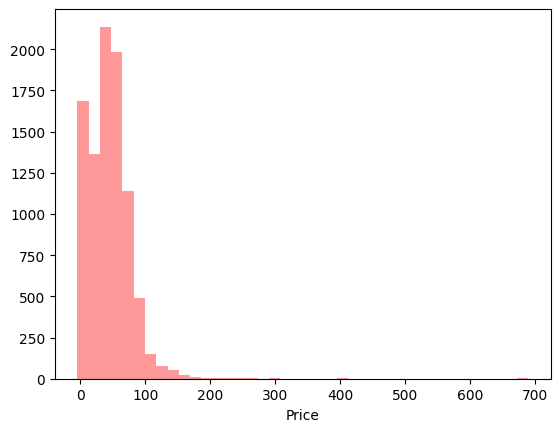

In [21]:
sns.distplot(df['Price'],bins=40,kde=False, color='red')

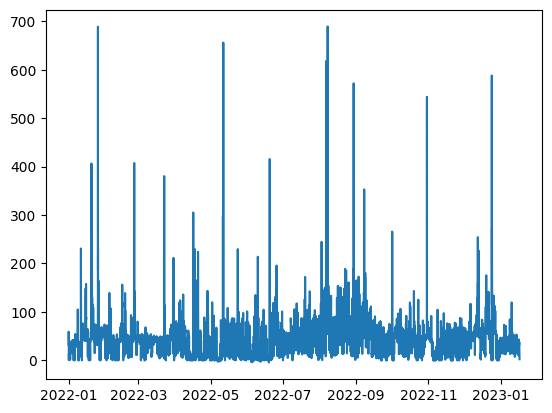

In [22]:
plt.plot(df['Date'], df['Price'])

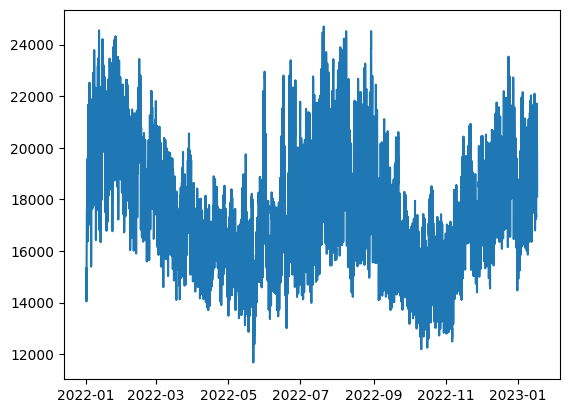

In [23]:
plt.plot(df['Date'], df['Market Demand'])

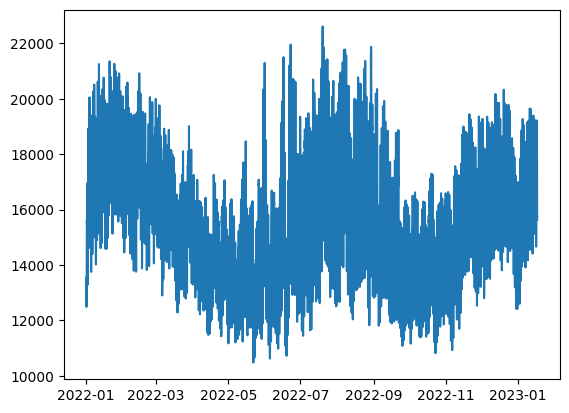

In [24]:
plt.plot(df['Date'], df['Ontario Demand'])

In [25]:
df.to_csv(file_dir+'interim/final_data.csv',index=False)